In [530]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

plt.style.use('ggplot')

# Institutional data

In [84]:
inst_data = pd.read_csv("../data/institutional_data/nps_institutional_data.csv")
inst_data['date'] = pd.to_datetime(inst_data['date'], format="%d.%m.%Y")
inst_data.region = inst_data.region.replace(
    {"Республика Крым**": "Республика Крым",
     "г. Севастополь**": "г. Севастополь",
     "Кемеровская область-Кузбасс": "Кемеровская область",
     "Кемеровская область - Кузбасс": "Кемеровская область",
     "Чукотский авт. округ": "Чукотский автономный округ",
     "Еврейская авт. область": "Еврейская автономная область",
    }
)
inst_data["Total number of banking system institutions"] = inst_data["Total number of banking system institutions"].str.replace(" ", "").astype(float)
inst_data["additional offices"] = inst_data["additional offices"].str.replace(" ", "").astype(float)
inst_data["Number of bank institutions per 1 million inhabitants"] = inst_data["Number of bank institutions per 1 million inhabitants"].str.replace("-", "0")
inst_data["Number of bank institutions per 1 million inhabitants"] = inst_data["Number of bank institutions per 1 million inhabitants"].str.replace(" ", "").astype(float)
inst_data["Number of bank institutions per 1 million inhabitants"] = inst_data["Number of bank institutions per 1 million inhabitants"].replace({0: inst_data["Number of bank institutions per 1 million inhabitants"].mean()})
inst_data.head()

,date,region,Total number of banking system institutions,institutions of the Bank of Russia,credit institutions,branches of credit organizations,additional offices,Number of bank institutions per 1 million inhabitants
0,2008-10-01,Алтайский край,1005.0,16,8,59,300.0,398.0
1,2008-10-01,Амурская область,251.0,4,5,17,173.0,287.0
2,2008-10-01,Архангельская область,310.0,15,3,35,142.0,242.0
3,2008-10-01,Астраханская область,273.0,4,5,30,112.0,275.0
4,2008-10-01,Белгородская область,465.0,5,6,33,135.0,307.0


# Accounts data

In [85]:
accounts_data = pd.read_csv("../data/accounts_data/accounts_data.csv")
accounts_data['date'] = pd.to_datetime(accounts_data['date'], format="%d.%m.%Y")
accounts_data.region = accounts_data.region.replace(
    {"Республика Крым**": "Республика Крым",
     "г. Севастополь**": "г. Севастополь",
     "Кемеровская область-Кузбасс": "Кемеровская область",
     "Кемеровская область - Кузбасс": "Кемеровская область",
     "Еврейская авт. область": "Еврейская автономная область",
    }
)
accounts_data["total_accounts"] = accounts_data["total_accounts"].str.replace(" ", "").str.replace(",", ".").astype(float)
accounts_data["total_in_credit_org"] = accounts_data["total_in_credit_org"].str.replace(" ", "").str.replace(",", ".").astype(float)
accounts_data["clients-legal entities that are not credit institutions"] = accounts_data["clients-legal entities that are not credit institutions"].str.replace(" ", "").str.replace(",", ".").astype(float)
accounts_data["individual clients"] = accounts_data["individual clients"].str.replace(" ", "").str.replace(",", ".").astype(float)
accounts_data["The number of accounts opened by institutions of the banking system, per 1 resident, units."] = accounts_data["The number of accounts opened by institutions of the banking system, per 1 resident, units."].str.replace(" ", "").str.replace(",", ".").str.replace("-", "0").astype(float)
accounts_data["The number of accounts opened by institutions of the banking system, per 1 resident, units."] = accounts_data["The number of accounts opened by institutions of the banking system, per 1 resident, units."].replace({0: accounts_data["The number of accounts opened by institutions of the banking system, per 1 resident, units."].mean()})
accounts_data.head()

,date,region,total_accounts,total_in_credit_org,clients-legal entities that are not credit institutions,individual clients,"The number of accounts opened by institutions of the banking system, per 1 resident, units."
0,2010-01-01,Алтайский край,5937.4,5935.4,63.7,5871.7,2.4
1,2010-01-01,Амурская область,2774.8,2774.2,29.7,2744.5,3.2
2,2010-01-01,Архангельская область,3864.2,3863.4,45.1,3818.3,3.1
3,2010-01-01,Астраханская область,2688.1,2687.6,32.3,2655.3,2.7
4,2010-01-01,Белгородская область,4444.1,4443.4,50.0,4393.4,2.9


In [86]:
list(set(inst_data.region.unique()) - set(accounts_data.region.unique()))

['Читинская область']

In [87]:
accounts_inst_merged = pd.merge(
    accounts_data, inst_data,
    on=["date", "region"], how="inner"
).drop_duplicates(
    subset=["date", "region"]
)
print(accounts_inst_merged.shape)

(4427, 13)


# Remote accounts (amount)

In [88]:
remote_accounts_amount_data = pd.read_csv("../data/remote_accounts_amount/number_remote_accounts.csv")
remote_accounts_amount_data['date'] = pd.to_datetime(remote_accounts_amount_data['date'], format="%d.%m.%Y")
remote_accounts_amount_data.region = remote_accounts_amount_data.region.replace(
    {"Республика Крым**": "Республика Крым",
     "г. Севастополь**": "г. Севастополь",
     "Кемеровская область-Кузбасс": "Кемеровская область",
     "Кемеровская область - Кузбасс": "Кемеровская область",
     "Еврейская авт. область": "Еврейская автономная область",
    }
)

remote_accounts_amount_data = remote_accounts_amount_data[["date", "region", "number_of_new_remote_accounts", "number_of_new_remote_accounts_individuals", "number_of_new_remote_accounts_individuals_with_internet", "number_of_new_remote_accounts_individuals_with_sms"]]



remote_accounts_amount_data["number_of_new_remote_accounts"] = remote_accounts_amount_data["number_of_new_remote_accounts"].str.replace(" ", "").str.replace(",", ".").astype(float)
remote_accounts_amount_data["number_of_new_remote_accounts_individuals"] = remote_accounts_amount_data["number_of_new_remote_accounts_individuals"].str.replace(" ", "").str.replace(",", ".").astype(float)
remote_accounts_amount_data["number_of_new_remote_accounts_individuals_with_internet"] = remote_accounts_amount_data["number_of_new_remote_accounts_individuals_with_internet"].str.replace(" ", "").str.replace(",", ".").astype(float)
remote_accounts_amount_data["number_of_new_remote_accounts_individuals_with_sms"] = remote_accounts_amount_data["number_of_new_remote_accounts_individuals_with_sms"].str.replace(" ", "").str.replace(",", ".").astype(float)
remote_accounts_amount_data.head()

,date,region,number_of_new_remote_accounts,number_of_new_remote_accounts_individuals,number_of_new_remote_accounts_individuals_with_internet,number_of_new_remote_accounts_individuals_with_sms
0,2010-10-01,Алтайский край,508.2,487.4,49.8,342.2
1,2010-10-01,Амурская область,280.8,275.6,29.7,38.9
2,2010-10-01,Архангельская область,291.7,281.0,25.5,172.2
3,2010-10-01,Астраханская область,668.0,662.8,2.9,127.8
4,2010-10-01,Белгородская область,732.7,721.2,35.8,127.5


In [90]:
accounts_inst_remote_accounts_merged = pd.merge(
    accounts_inst_merged, remote_accounts_amount_data,
    on=["date", "region"], how="inner"
).drop_duplicates(
    subset=["date", "region"]
)
print(accounts_inst_remote_accounts_merged.shape)

(4427, 17)


In [9]:
accounts_inst_remote_accounts_merged.to_csv("for_index.csv")

# Bills amount

In [397]:
from os import listdir
from os.path import isfile, join

mypath = "../data/bills_amount/"

onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]

sheets = ["Q1", "Q2", "Q3", "Q4"]

cols = [
    "date", "region",
    "orders in electronic form total", "orders in electronic form with internet",
    "payments orders", "payments orders with internet",
    "letter of credit", "payment requirements", "payment requirements with internet",
    "collection orders", "bank orders"
]

bills = pd.DataFrame(columns=cols)

for file in onlyfiles:
    for sheet in pd.ExcelFile(mypath + file).sheet_names:
        dfs = pd.read_excel(mypath + file, sheet_name=sheet)
        dfs.columns = cols
        for col in dfs.drop(labels=["date", "region"], axis=1).columns:
            try:
                dfs[col] = dfs[col].str.replace(" ", "").str.replace(",", ".").astype(float)
            except Exception as err:
                print(col, err)
        bills = pd.concat([bills, dfs], axis=0)

bills['date'] = pd.to_datetime(bills['date'], format="%d.%m.%Y")
bills.region = bills.region.replace(
    {"Республика Крым**": "Республика Крым",
     "г. Севастополь**": "г. Севастополь",
     "Кемеровская область-Кузбасс": "Кемеровская область",
     "Кемеровская область - Кузбасс": "Кемеровская область",
     "Еврейская авт. область": "Еврейская автономная область",
    }
)



/var/folders/50/qly_r7y17754hf5lyq92cnjh0000gn/T/ipykernel_24199/4248260101.py:29: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  bills = pd.concat([bills, dfs], axis=0)


orders in electronic form total Can only use .str accessor with string values!
orders in electronic form with internet Can only use .str accessor with string values!
payments orders Can only use .str accessor with string values!
payments orders with internet Can only use .str accessor with string values!
letter of credit Can only use .str accessor with string values!
payment requirements Can only use .str accessor with string values!
payment requirements with internet Can only use .str accessor with string values!
collection orders Can only use .str accessor with string values!
bank orders Can only use .str accessor with string values!
orders in electronic form total Can only use .str accessor with string values!
orders in electronic form with internet Can only use .str accessor with string values!
payments orders Can only use .str accessor with string values!
payments orders with internet Can only use .str accessor with string values!
letter of credit Can only use .str accessor with s

In [399]:
bills_accounts_inst_remote_accounts_merged = pd.merge(
    accounts_inst_remote_accounts_merged, bills,
    on=["date", "region"], how="inner"
).drop_duplicates(
    subset=["date", "region"]
)
print(bills_accounts_inst_remote_accounts_merged.shape)

(3468, 26)


# Bills Volume

In [437]:
from os import listdir
from os.path import isfile, join

mypath = "../data/bills_volume/"

onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]

sheets = ["Q1", "Q2", "Q3", "Q4"]

cols = [
    "date", "region",
    "volume orders in electronic form total", "volume orders in electronic form with internet",
    "volume payments orders", "volume payments orders with internet",
    "volume letter of credit", "volume payment requirements", "volume payment requirements with internet",
    "volume collection orders", "volume bank orders"
]

bills_vol = pd.DataFrame(columns=cols)

for file in onlyfiles:
    for sheet in pd.ExcelFile(mypath + file).sheet_names:
        dfs = pd.read_excel(mypath + file, sheet_name=sheet)
        dfs.columns = cols
        for col in dfs.drop(labels=["date", "region"], axis=1).columns:
            try:
                dfs[col] = dfs[col].str.replace(" ", "").str.replace(",", ".").astype(float)
            except Exception as err:
                print(col, err)
        bills_vol = pd.concat([bills_vol, dfs], axis=0)

bills_vol['date'] = pd.to_datetime(bills_vol['date'], format="%d.%m.%Y")
bills_vol.region = bills_vol.region.replace(
    {"Республика Крым**": "Республика Крым",
     "г. Севастополь**": "г. Севастополь",
     "Кемеровская область-Кузбасс": "Кемеровская область",
     "Кемеровская область - Кузбасс": "Кемеровская область",
     "Еврейская авт. область": "Еврейская автономная область",
    }
)



/var/folders/50/qly_r7y17754hf5lyq92cnjh0000gn/T/ipykernel_24199/2181476563.py:29: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  bills_vol = pd.concat([bills_vol, dfs], axis=0)


In [438]:
bills_vol_accounts_inst_remote_accounts_merged = pd.merge(
    bills_accounts_inst_remote_accounts_merged, bills_vol,
    on=["date", "region"], how="inner"
).drop_duplicates(
    subset=["date", "region"]
)
print(bills_accounts_inst_remote_accounts_merged.shape)

(3468, 26)


# Index Construction

In [439]:
from scipy.stats import gmean

In [545]:
df = bills_vol_accounts_inst_remote_accounts_merged.copy()

df = df[~df["region"].isin(["Херсонская область", "Запорожская область", "Луганская Народная Республика", "Донецкая Народная Республика", "г. Севастополь", "Республика Крым"])]

corr_features = [
    "total_accounts",
    "additional offices",
    "volume bank orders",
    "volume payments orders",
    "volume orders in electronic form total",
    "letter of credit",
    "volume letter of credit",
    "volume payment requirements with internet",
    "volume payments orders with internet",
    "individual clients",
    #"individual clients",
    # "additional offices",
    "total_in_credit_org",
    "number_of_new_remote_accounts_individuals_with_sms",
    "clients-legal entities that are not credit institutions",
    "number_of_new_remote_accounts",
    "number_of_new_remote_accounts_individuals_with_internet",
    "orders in electronic form total",
    "number_of_new_remote_accounts_individuals",
    "orders in electronic form with internet",
    "payments orders",
    "payment requirements",
    "bank orders"
    # "clients-legal entities that are not credit institutions",
    # "number_of_new_remote_accounts_individuals",
    # "clients-legal entities that are not credit institutions",
    # "number_of_new_remote_accounts",
    # "clients-legal entities that are not credit institutions",
    # "number_of_new_remote_accounts_individuals",
    # "number_of_new_remote_accounts_individuals",
    # "total_in_credit_org",
    # "number_of_new_remote_accounts_individuals_with_internet"
]

df = df.drop(labels=corr_features, axis=1, errors="ignore")

In [546]:
df.select_dtypes("float").corr()

,"The number of accounts opened by institutions of the banking system, per 1 resident, units.",Total number of banking system institutions,Number of bank institutions per 1 million inhabitants,payments orders with internet,payment requirements with internet,collection orders,volume orders in electronic form with internet,volume payment requirements,volume collection orders
"The number of accounts opened by institutions of the banking system, per 1 resident, units.",1.000000,0.608728,0.084612,0.473038,0.648330,0.709817,0.632049,0.342596,0.633877
Total number of banking system institutions,0.608728,1.000000,0.203355,0.356287,0.502843,0.463663,0.622523,0.233655,0.534940
Number of bank institutions per 1 million inhabitants,0.084612,0.203355,1.000000,-0.037617,-0.069984,-0.123921,-0.024103,-0.027308,-0.043457
payments orders with internet,0.473038,0.356287,-0.037617,1.000000,0.849416,0.566486,0.760194,0.540248,0.756123
payment requirements with internet,0.648330,0.502843,-0.069984,0.849416,1.000000,0.782129,0.843034,0.667543,0.790275
collection orders,0.709817,0.463663,-0.123921,0.566486,0.782129,1.000000,0.667852,0.447239,0.734799
volume orders in electronic form with internet,0.632049,0.622523,-0.024103,0.760194,0.843034,0.667852,1.000000,0.564277,0.778415
volume payment requirements,0.342596,0.233655,-0.027308,0.540248,0.667543,0.447239,0.564277,1.000000,0.363203
volume collection orders,0.633877,0.534940,-0.043457,0.756123,0.790275,0.734799,0.778415,0.363203,1.000000


In [547]:
pd.set_option("display.max_columns", None)
df.describe()

,date,"The number of accounts opened by institutions of the banking system, per 1 resident, units.",Total number of banking system institutions,institutions of the Bank of Russia,credit institutions,branches of credit organizations,Number of bank institutions per 1 million inhabitants,payments orders with internet,payment requirements with internet,collection orders,volume orders in electronic form with internet,volume payment requirements,volume collection orders
count,3379,3379.000000,3379.000000,3379.000000,3379.000000,3379.000000,3379.000000,3.379000e+03,3379.000000,3379.000000,3379.000000,3379.000000,3379.000000
mean,2018-04-15 05:43:29.174311936,4.317254,426.487422,3.098550,6.860906,13.039065,236.004735,6.841465e+03,40.459653,267.741487,1734.400503,6.068955,1.713495
min,2013-01-01 00:00:00,0.100000,11.000000,0.000000,0.000000,0.000000,23.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2015-07-01 00:00:00,3.600000,156.500000,1.000000,1.000000,3.000000,187.000000,5.700000e+02,3.200000,27.400000,69.850000,0.100000,0.100000
50%,2018-04-01 00:00:00,4.000000,271.000000,2.000000,2.000000,6.000000,231.000000,1.124700e+03,15.900000,82.046000,176.700000,0.200000,0.300000
75%,2021-01-01 00:00:00,4.700000,514.000000,4.000000,5.000000,13.000000,287.000000,2.485500e+03,39.342500,182.731500,487.650000,0.900000,0.700000
max,2023-10-01 00:00:00,22.000000,7224.000000,18.000000,498.000000,188.000000,573.000000,2.281427e+06,2756.800000,9830.900000,319289.300000,3474.200000,240.100000
std,NaN,1.995255,589.821215,2.887478,33.170919,20.134442,84.809241,6.636163e+04,126.758187,712.510538,12519.244433,95.183876,7.987429


In [548]:
# for col in df.drop(labels=["region", "date"], axis=1).columns:
#     df[f'{col}_normalized'] = (
#         df.groupby(['date'])[col]
#         .transform(lambda x: (x - x.min()) / (x.max() - x.min()))
#     )

import numpy as np

for col in df.drop(labels=["region", "date"], axis=1).columns:
    df[f'{col}_normalized'] = (
        df.groupby(['date'])[col]
        .transform(
            lambda x: (lambda tx: (tx - tx.min()) / (tx.max() - tx.min() + 1e-8))(  # +1e-8 чтобы избежать деления на 0
                np.where(x >= 1, np.log(x), 0)  # Если x < 1 → 0, иначе log(x)
            )
        )
    )

/Users/ppp/env/lib/python3.13/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/ppp/env/lib/python3.13/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/ppp/env/lib/python3.13/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/ppp/env/lib/python3.13/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/ppp/env/lib/python3.13/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/ppp/env/lib/python3.13/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountere

In [549]:
def geometric_mean_no_zeros(row):
    # Отбираем только значения больше нуля
    positive_values = row[row > 0]
    if len(positive_values) == 0:  # Если все значения равны нулю
        return 0
    return gmean(positive_values)

df['geometric_mean'] = df[df.columns[df.columns.str.contains("_normalized")]].apply(geometric_mean_no_zeros, axis=1)

In [550]:
df = df.sort_values(by=["date", "region"])
df.index = df.date

In [551]:
pd.set_option("display.max_rows", 100)

In [552]:
df[(df["date"].dt.year == 2023) & (df["date"].dt.month == 10)].sort_values(by="geometric_mean", ascending=False)[["region", "geometric_mean"]]

,region,geometric_mean
date,,
2023-10-01,г. Москва и Московская область,0.958005
2023-10-01,г. Санкт-Петербург,0.686576
2023-10-01,Новосибирская область,0.664614
2023-10-01,Свердловская область,0.627176
2023-10-01,Тюменская область,0.555673
2023-10-01,Нижегородская область,0.541749
2023-10-01,Краснодарский край,0.525084
2023-10-01,Хабаровский край,0.521635
2023-10-01,Ростовская область,0.517771


In [477]:
df.region.unique()

array(['Астраханская область', 'Белгородская область', 'Брянская область',
       'Владимирская область', 'Волгоградская область',
       'Вологодская область', 'Воронежская область',
       'Еврейская автономная область', 'Забайкальский край',
       'Ивановская область', 'Иркутская область',
       'Кабардино-Балкарская Республика', 'Калининградская область',
       'Калужская область', 'Камчатский край',
       'Карачаево-Черкесская Республика', 'Кемеровская область',
       'Кировская область', 'Костромская область', 'Краснодарский край',
       'Красноярский край', 'Курганская область', 'Курская область',
       'Ленинградская область', 'Липецкая область', 'Магаданская область',
       'Мурманская область', 'Нижегородская область',
       'Новгородская область', 'Новосибирская область', 'Омская область',
       'Оренбургская область', 'Орловская область', 'Пензенская область',
       'Пермский край', 'Приморский край', 'Псковская область',
       'Республика Адыгея (Адыгея)', 'Рес

<Axes: xlabel='date'>

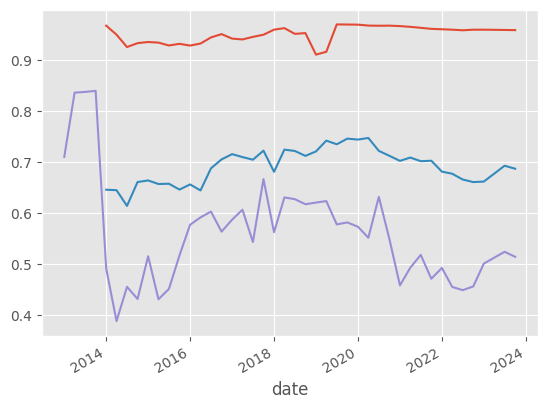

In [557]:
df[df["region"].isin(["г. Москва и Московская область"])]["geometric_mean"].plot()
df[df["region"].isin(["г. Санкт-Петербург"])]["geometric_mean"].plot()
df[df["region"].isin(["Самарская область"])]["geometric_mean"].plot()

<Axes: xlabel='date'>

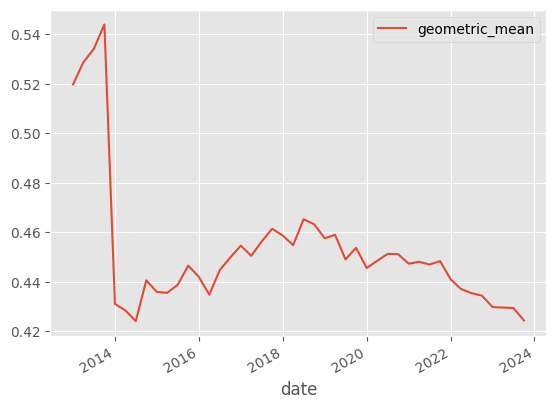

In [570]:
df.reset_index(drop=True)[["date", "geometric_mean"]].groupby("date").mean().plot()

In [486]:
rename_dict = {
    'Астраханская область': 'Astrakhan region',
    'Белгородская область': 'Belgorod region',
    'Брянская область': 'Bryansk region',
    'Владимирская область': 'Vladimir region',
    'Волгоградская область': 'Volgograd region',
    'Вологодская область': 'Vologda Region',
    'Воронежская область': 'Voronezh region',
    'Еврейская автономная область': 'Jewish Autonomous Region',
    'Забайкальский край': 'Zabaykalsky Krai',
    'Ивановская область': 'Ivanovo region',
    'Иркутская область': 'Irkutsk region',
    'Кабардино-Балкарская Республика': 'Kabardino-Balkar Republic',
    'Калининградская область': 'Kaliningrad region',
    'Калужская область': 'Kaluga region',
    'Камчатский край': 'Kamchatka Krai',
    'Карачаево-Черкесская Республика': 'Karachay-Cherkess Republic',
    'Кемеровская область': 'Kemerovo region',
    'Кировская область': 'Kirov region',
    'Костромская область': 'Kostroma region',
    'Краснодарский край': 'Krasnodar region',
    'Красноярский край': 'Krasnoyarsk region',
    'Курганская область': 'Kurgan region',
    'Курская область': 'Kursk region',
    'Ленинградская область': 'Leningrad region',
    'Липецкая область': 'Lipetsk region',
    'Магаданская область': 'Magadan Region',
    'Мурманская область': 'Murmansk region',
    'Нижегородская область': 'Nizhny Novgorod Region',
    'Новгородская область': 'Novgorod region',
    'Новосибирская область': 'Novosibirsk region',
    'Омская область': 'Omsk region',
    'Оренбургская область': 'Orenburg region',
    'Орловская область': 'Oryol Region',
    'Пензенская область': 'Penza region',
    'Пермский край': 'Perm',
    'Приморский край': 'Primorsky Krai',
    'Псковская область': 'Pskov region',
    'Республика Адыгея (Адыгея)': 'Republic of Adygea',
    'Республика Алтай': 'Altai Republic',
    'Республика Башкортостан': 'Republic of Bashkortostan',
    'Республика Бурятия': 'The Republic of Buryatia',
    'Республика Дагестан': 'The Republic of Dagestan',
    'Республика Ингушетия': 'The Republic of Ingushetia',
    'Республика Калмыкия': 'Republic of Kalmykia',
    'Республика Карелия': 'The Republic of Karelia',
    'Республика Коми': 'Komi Republic',
    'Республика Марий Эл': 'Mari El Republic',
    'Республика Мордовия': 'The Republic of Mordovia',
    'Республика Саха (Якутия)': 'The Republic of Sakha (Yakutia)',
    'Республика Татарстан (Татарстан)': 'Republic of Tatarstan',
    'Республика Тыва': 'Tyva Republic',
    'Республика Хакасия': 'The Republic of Khakassia',
    'Ростовская область': 'Rostov region',
    'Рязанская область': 'Ryazan Oblast',
    'Самарская область': 'Samara Region',
    'Саратовская область': 'Saratov region',
    'Сахалинская область': 'Sakhalin region',
    'Свердловская область': 'Sverdlovsk region',
    'Смоленская область': 'Smolensk region',
    'Ставропольский край': 'Stavropol region',
    'Тамбовская область': 'Tambov Region',
    'Тверская область': 'Tver region',
    'Томская область': 'Tomsk region',
    'Тульская область': 'Tula region',
    'Тюменская область': 'Tyumen region',
    'Удмуртская Республика': 'Udmurt republic',
    'Ульяновская область': 'Ulyanovsk region',
    'Хабаровский край': 'Khabarovsk region',
    'Челябинская область': 'Chelyabinsk region',
    'Чеченская Республика': 'Chechen Republic',
    'Чувашская Республика - Чувашия': 'Chuvash Republic',
    'Чукотский автономный округ': 'Chukotka Autonomous Okrug',
    'Ярославская область': 'Yaroslavl region',
    'Амурская область': 'Amurskaya Oblast',
    'Архангельская область': 'Arkhangelsk region',
    'Алтайский край': 'Altai region',
    'Республика Северная Осетия-Алания': 'Republic of North Ossetia - Alania',
    'г. Москва и Московская область': 'Moscow and Moscow region',
    'г. Санкт-Петербург': 'St. Petersburg'
}

In [558]:
df_en = df.copy()
df_en["region"] = df_en["region"].replace(rename_dict)

In [561]:
df_en.to_csv("payment_index.csv", index=False)

In [559]:
df_en.region.unique()

array(['Astrakhan region', 'Belgorod region', 'Bryansk region',
       'Vladimir region', 'Volgograd region', 'Vologda Region',
       'Voronezh region', 'Jewish Autonomous Region', 'Zabaykalsky Krai',
       'Ivanovo region', 'Irkutsk region', 'Kabardino-Balkar Republic',
       'Kaliningrad region', 'Kaluga region', 'Kamchatka Krai',
       'Karachay-Cherkess Republic', 'Kemerovo region', 'Kirov region',
       'Kostroma region', 'Krasnodar region', 'Krasnoyarsk region',
       'Kurgan region', 'Kursk region', 'Leningrad region',
       'Lipetsk region', 'Magadan Region', 'Murmansk region',
       'Nizhny Novgorod Region', 'Novgorod region', 'Novosibirsk region',
       'Omsk region', 'Orenburg region', 'Oryol Region', 'Penza region',
       'Perm', 'Primorsky Krai', 'Pskov region', 'Republic of Adygea',
       'Altai Republic', 'Republic of Bashkortostan',
       'The Republic of Buryatia', 'The Republic of Dagestan',
       'The Republic of Ingushetia', 'Republic of Kalmykia',
    